In [2]:
!pwd

/home/ms86336/Downloads/paris


# Validation

In [34]:
import xarray as xr
ds_gc = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_28_washington_36hr.nc').isel(time=slice(1,7))
ds_pred = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_28_washington_36hr_pred.nc')

In [50]:
import numpy as np

298.8813

In [51]:
ds_temp_pred = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_28_washington_36hr_temppred.nc')
ds_pred['TMP_2maboveground'] = ds_temp_pred['TMP_2maboveground'] - np.mean(ds_temp_pred['TMP_2maboveground'].values) + np.mean(ds_gc['t2m'].values)
ds_pred

<xarray.Dataset> Size: 29MB
Dimensions:              (latitude: 240, longitude: 240, time: 31, lat: 9,
                          lon: 9)
Coordinates:
  * latitude             (latitude) float64 2kB 39.0 39.01 39.02 ... 40.99 41.0
  * longitude            (longitude) float64 2kB 282.0 282.0 ... 284.0 284.0
  * time                 (time) datetime64[ns] 248B 2024-07-29 ... 2024-07-30...
  * lat                  (lat) float64 72B 39.0 39.25 39.5 ... 40.5 40.75 41.0
  * lon                  (lon) float64 72B 282.0 282.2 282.5 ... 283.8 284.0
Data variables:
    APCP_surface         (time, latitude, longitude) float32 7MB 0.0 ... 0.02297
    TMP_2maboveground    (time, latitude, longitude) float32 7MB 292.7 ... 293.0
    UGRD_10maboveground  (time, latitude, longitude) float32 7MB ...
    VGRD_10maboveground  (time, latitude, longitude) float32 7MB ...

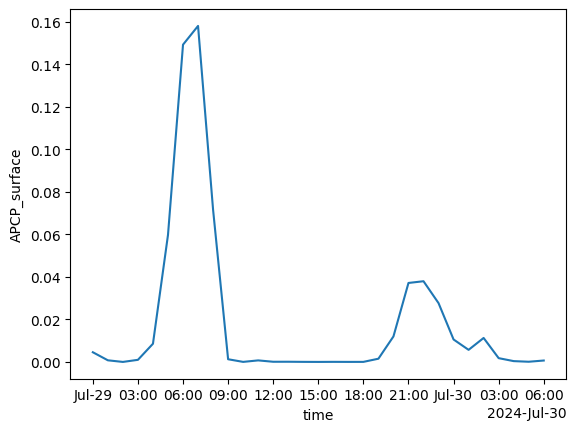

In [52]:
ds_pred.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot()

In [53]:

start_time = ds_gc.time.values[0]
end_time = ds_gc.time.values[-1]

# Load the AORC datasets
ds_aorc_apcp = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_APCP_surface_2017_2023.nc').sel(time=slice(start_time, end_time))
ds_aorc_t2m   = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_TMP_2maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
ds_aorc_u10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_UGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
ds_aorc_v10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_VGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))

# Ensure the target variables are in the same shape
target_data = xr.Dataset({
    'APCP_surface': ds_aorc_apcp['APCP_surface'],
    'TMP_2maboveground': ds_aorc_t2m['TMP_2maboveground'],
    'UGRD_10maboveground': ds_aorc_u10['UGRD_10maboveground'],
    'VGRD_10maboveground': ds_aorc_v10['VGRD_10maboveground']
})

In [54]:
ds_gc

<xarray.Dataset> Size: 10kB
Dimensions:  (time: 6, history: 1, lat: 9, lon: 9)
Coordinates:
  * lat      (lat) float64 72B 39.0 39.25 39.5 39.75 40.0 40.25 40.5 40.75 41.0
  * lon      (lon) float64 72B 282.0 282.2 282.5 282.8 ... 283.5 283.8 284.0
  * time     (time) datetime64[ns] 48B 2024-07-29 ... 2024-07-30T06:00:00
Dimensions without coordinates: history
Data variables:
    u10m     (time, history, lat, lon) float32 2kB ...
    v10m     (time, history, lat, lon) float32 2kB ...
    t2m      (time, history, lat, lon) float32 2kB 302.3 302.5 ... 294.1 293.6
    tp06     (time, history, lat, lon) float32 2kB -2.077e-06 ... 0.0002945
    q1000    (time, history, lat, lon) float32 2kB ...

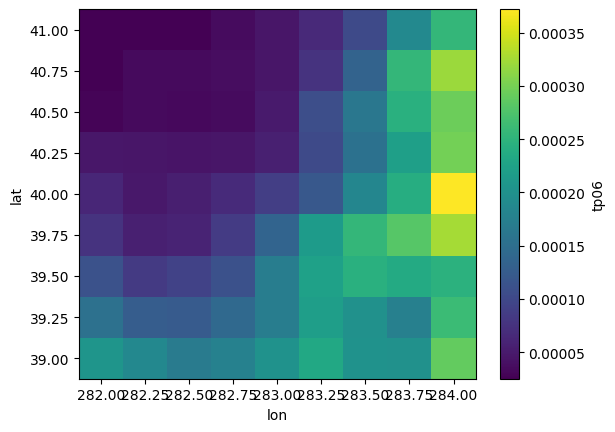

In [55]:
ds_gc.tp06.mean(dim='time').plot()

In [56]:
target_data

<xarray.Dataset> Size: 4kB
Dimensions:              (latitude: 240, longitude: 240, time: 0)
Coordinates:
  * latitude             (latitude) float64 2kB 39.01 39.02 39.02 ... 40.99 41.0
  * longitude            (longitude) float64 2kB -77.99 -77.99 ... -76.01 -76.0
  * time                 (time) datetime64[ns] 0B 
Data variables:
    APCP_surface         (time, latitude, longitude) float64 0B ...
    TMP_2maboveground    (time, latitude, longitude) float64 0B ...
    UGRD_10maboveground  (time, latitude, longitude) float64 0B ...
    VGRD_10maboveground  (time, latitude, longitude) float64 0B ...

In [57]:
# target_data.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot()

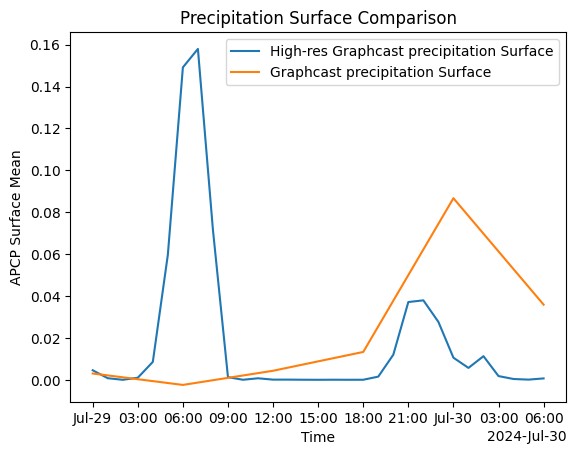

In [58]:
import matplotlib.pyplot as plt
ds_pred.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast precipitation Surface')
# target_data.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot(label='Actual precipitation Surface')
gc_tp = ds_gc.tp06*1000/6
gc_tp.mean(dim='lat').mean(dim='lon').plot(label='Graphcast precipitation Surface')
plt.title('Precipitation Surface Comparison')
plt.xlabel('Time')
plt.ylabel('APCP Surface Mean')
plt.legend()

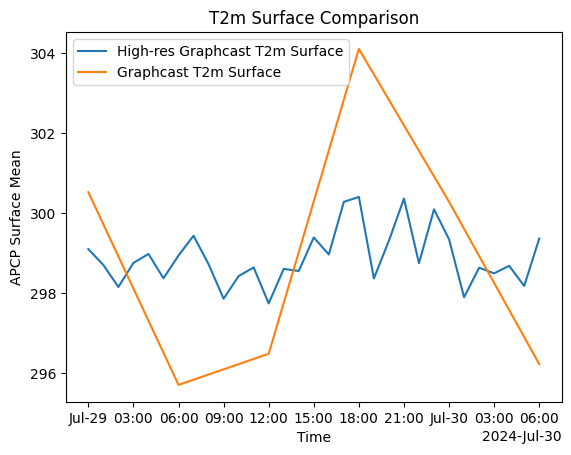

In [59]:
import matplotlib.pyplot as plt
ds_pred.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast T2m Surface')
# target_data.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual T2m Surface')
ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast T2m Surface')
plt.title('T2m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('APCP Surface Mean')
plt.legend()

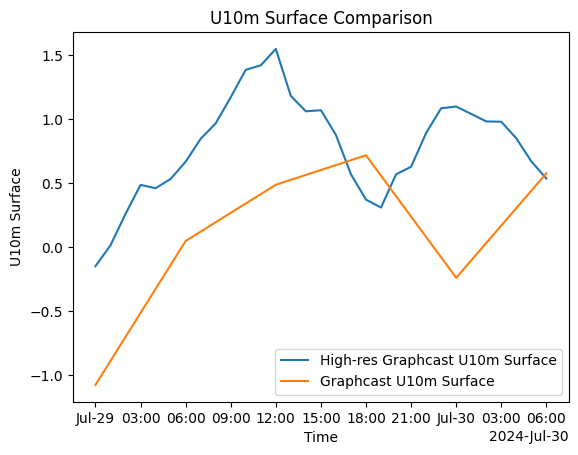

In [16]:
import matplotlib.pyplot as plt
ds_pred.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast U10m Surface')
# target_data.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual U10m Surface')
ds_gc.u10m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast U10m Surface')
plt.title('U10m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('U10m Surface')
plt.legend()

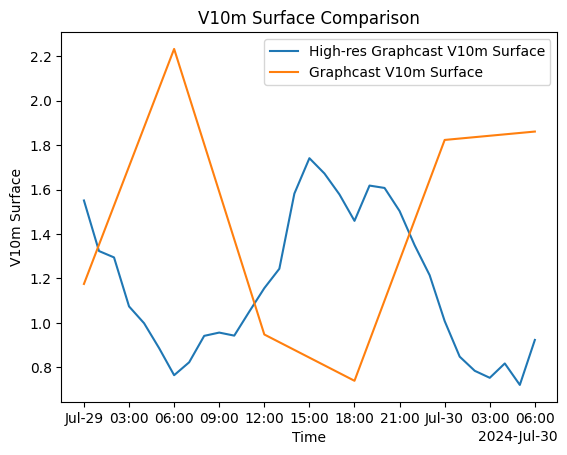

In [17]:
import matplotlib.pyplot as plt
ds_pred.VGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast V10m Surface')
# target_data.VGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual V10m Surface')
ds_gc.v10m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast V10m Surface')
plt.title('V10m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('V10m Surface')
plt.legend()

# Paris

# 26 July 2024

In [118]:
import xarray as xr
ds_gc = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_26_paris_36hr.nc').isel(time=slice(1,7))
ds_pred = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_26_paris_36hr_pred.nc')
ds_pred

<xarray.Dataset> Size: 29MB
Dimensions:              (latitude: 240, longitude: 240, time: 31)
Coordinates:
  * latitude             (latitude) float64 2kB 48.0 48.01 48.02 ... 49.99 50.0
  * longitude            (longitude) float64 2kB 1.5 1.508 1.517 ... 3.492 3.5
  * time                 (time) datetime64[ns] 248B 2024-07-26T12:00:00 ... 2...
Data variables:
    APCP_surface         (time, latitude, longitude) float32 7MB ...
    TMP_2maboveground    (time, latitude, longitude) float32 7MB ...
    UGRD_10maboveground  (time, latitude, longitude) float32 7MB ...
    VGRD_10maboveground  (time, latitude, longitude) float32 7MB ...

In [ ]:
ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6))

<xarray.Dataset> Size: 1MB
Dimensions:              (latitude: 36, longitude: 60, time: 31)
Coordinates:
  * latitude             (latitude) float64 288B 48.7 48.71 48.72 ... 48.99 49.0
  * longitude            (longitude) float64 480B 2.103 2.111 ... 2.588 2.596
  * time                 (time) datetime64[ns] 248B 2024-07-26T12:00:00 ... 2...
Data variables:
    APCP_surface         (time, latitude, longitude) float32 268kB 0.0 ... 0.0
    TMP_2maboveground    (time, latitude, longitude) float32 268kB 278.9 ... ...
    UGRD_10maboveground  (time, latitude, longitude) float32 268kB 1.477 ... ...
    VGRD_10maboveground  (time, latitude, longitude) float32 268kB -0.2847 .....

Text(0.5, 0, 'Time')

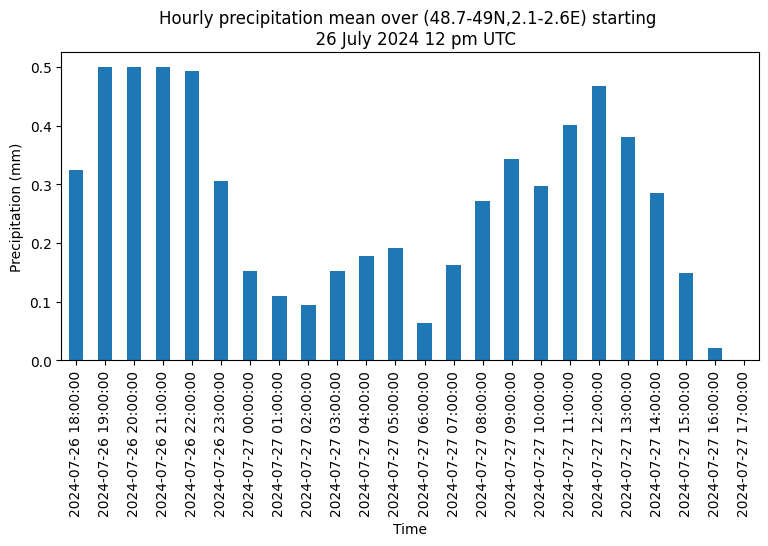

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
series = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.mean(dim='latitude').isel(time=slice(6,-1)).mean(dim='longitude').to_series().plot.bar(ax=ax)
# series.plot.bar(ax=ax)
plt.title('Hourly precipitation mean over (48.7-49N,2.1-2.6E) starting \n  26 July 2024 12 pm UTC')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Time')

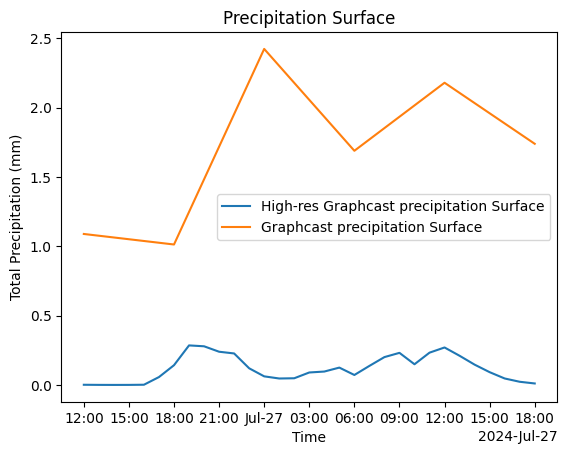

In [ ]:
import matplotlib.pyplot as plt
ds_pred.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast precipitation Surface')
# target_data.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot(label='Actual precipitation Surface')
gc_tp = ds_gc.tp06*1000
gc_tp.mean(dim='lat').mean(dim='lon').plot(label='Graphcast precipitation Surface')
plt.title('Precipitation Surface')
plt.xlabel('Time')
plt.ylabel('Total Precipitation (mm)')
plt.legend()

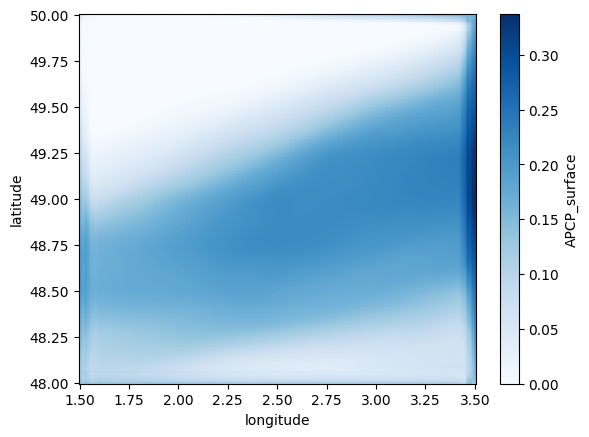

In [ ]:
ds_pred.APCP_surface.mean(dim='time').plot(cmap='Blues')

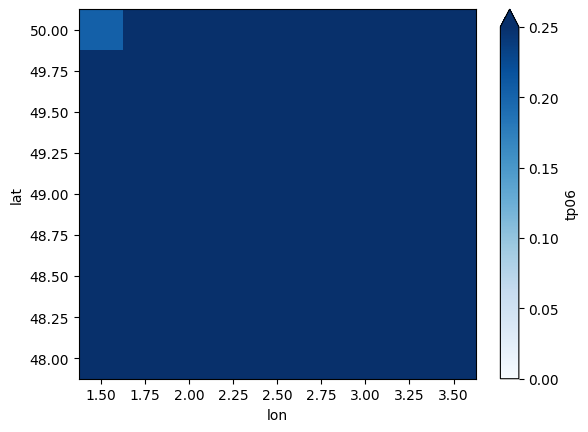

In [ ]:
tp = ds_gc.tp06.mean(dim='time')*1000
tp.plot(cmap='Blues',vmin=0, extend='max', vmax=0.25)

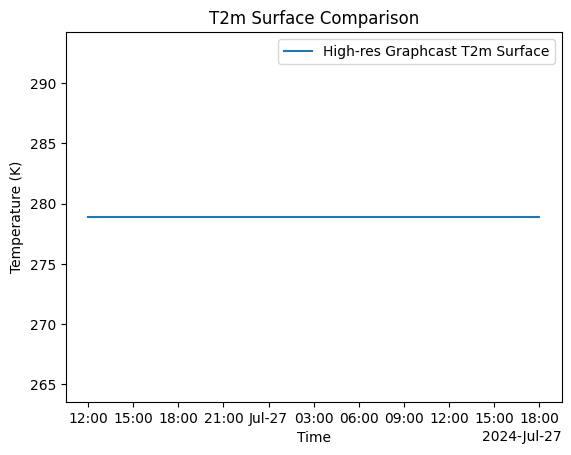

In [ ]:
import matplotlib.pyplot as plt
ds_pred.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast T2m Surface')
# target_data.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual T2m Surface')
# ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast T2m Surface')
plt.title('T2m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.legend()

/tmp/ipykernel_2743090/1193616485.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


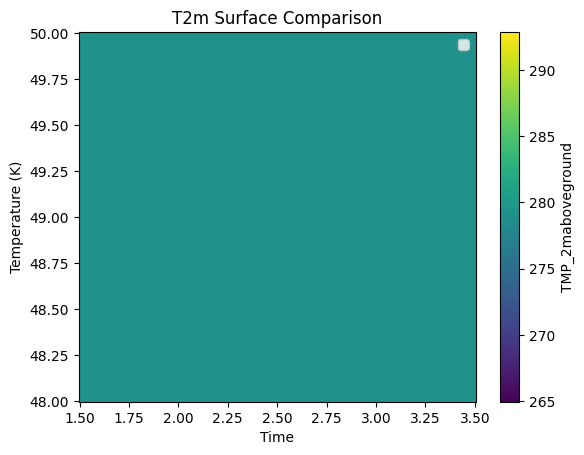

In [ ]:
import matplotlib.pyplot as plt
ds_pred.TMP_2maboveground.mean(dim='time').plot()
# target_data.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual T2m Surface')
# ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast T2m Surface')
plt.title('T2m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.legend()

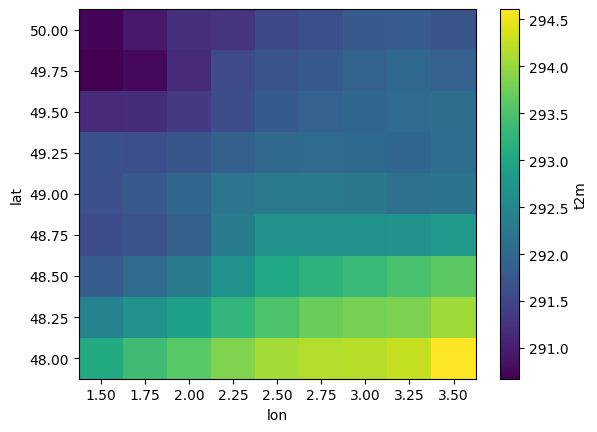

In [ ]:
ds_gc.t2m.mean(dim='time').plot()

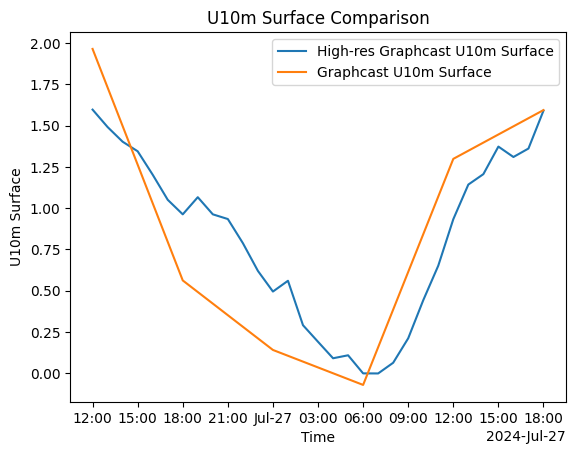

In [ ]:
import matplotlib.pyplot as plt
ds_pred.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast U10m Surface')
# target_data.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual U10m Surface')
ds_gc.u10m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast U10m Surface')
plt.title('U10m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('U10m Surface')
plt.legend()

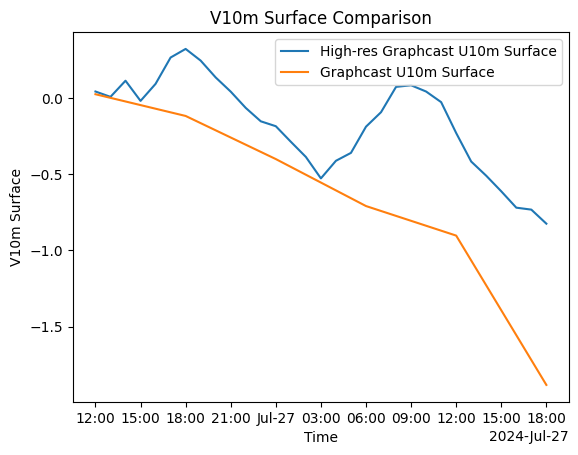

In [ ]:
import matplotlib.pyplot as plt
ds_pred.VGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='High-res Graphcast U10m Surface')
# target_data.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual U10m Surface')
ds_gc.v10m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast U10m Surface')
plt.title('V10m Surface Comparison')
plt.xlabel('Time')
plt.ylabel('V10m Surface')
plt.legend()

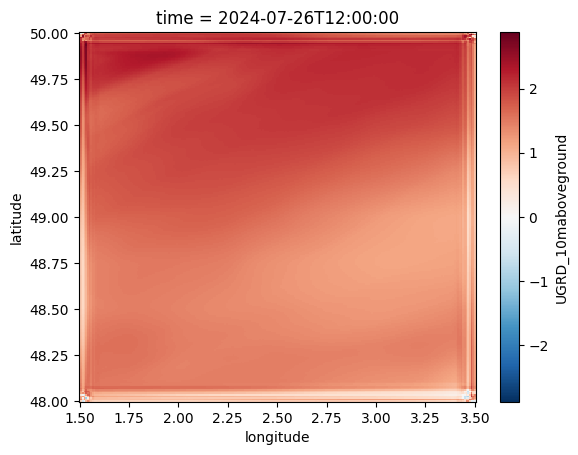

In [ ]:
ds_pred.UGRD_10maboveground.isel(time=0).plot()

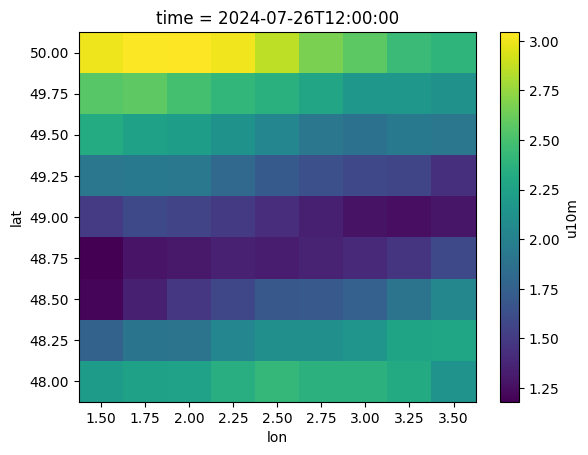

In [ ]:
ds_gc.u10m.isel(time=0).plot()

In [147]:
import osmnx as ox
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Configure OSMnx to retrieve data by specifying useful tags
tags = {'boundary': 'administrative', 'admin_level': '8'}  # admin_level 8 is usually cities/towns

# Specify the name or exact area you need. For example, 'Austin, Texas, USA'
city_name = 'Paris, France'
gdf = ox.geometries_from_place(city_name, tags=tags)

# Simplify the geometry if it's too detailed (optional, depending on your needs)
gdf['geometry'] = gdf['geometry'].simplify(0.001, preserve_topology=True)

# # Get the city boundaries using osmnx
# city_name = "Houston, Texas, USA"
city_boundary = ox.geocode_to_gdf(city_name)

# Get the road network within the city
road_network = ox.graph_from_place(city_name, network_type='all')

# Convert the road network to a GeoDataFrame
road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)

# Filter for major roads (primary, secondary, tertiary)
major_road_types = ['primary', 'secondary', 'tertiary']
major_roads = road_edges[road_edges['highway'].isin(major_road_types)]

/tmp/ipykernel_2590281/2984350954.py:11: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(city_name, tags=tags)


In [ ]:
# import osmnx as ox
# import xarray as xr
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

# # Configure OSMnx to retrieve data by specifying useful tags
# tags = {'boundary': 'administrative', 'admin_level': '8'}  # admin_level 8 is usually cities/towns

# # Specify the name or exact area you need. For example, 'Paris, France'
# city_name = 'Paris, France'
# gdf = ox.geometries_from_place(city_name, tags=tags)

# # Simplify the geometry if it's too detailed (optional, depending on your needs)
# gdf['geometry'] = gdf['geometry'].simplify(0.001, preserve_topology=True)

# # Get the city boundaries using osmnx
# city_boundary = ox.geocode_to_gdf(city_name)

# # Get the road network within the city
# road_network = ox.graph_from_place(city_name, network_type='all')

# # Convert the road network to a GeoDataFrame
# road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)

# # Filter for major roads and additional types (primary, secondary, tertiary, residential, motorway, trunk, etc.)
# road_types = ['primary', 'secondary', 'tertiary', 'residential', 'motorway', 'trunk', 'unclassified', 'service', 'living_street']
# selected_roads = road_edges[road_edges['highway'].apply(lambda x: isinstance(x, list) and any(road in road_types for road in x) or x in road_types)]

# # Plot the map
# fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
# city_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
# selected_roads.plot(ax=ax, linewidth=0.5, edgecolor='blue')

# plt.title(f"Road Network of {city_name}")
# plt.show()


In [ ]:
# import osmnx as ox
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

# # Define the central point and the radius
# central_point = (48.8566, 2.3522)  # Latitude and Longitude of Paris
# radius = 5000  # 50 km radius

# # Get the road network within the specified radius
# road_network = ox.graph_from_point(central_point, dist=radius, network_type='all')

# # Convert the road network to a GeoDataFrame
# road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)

# # Filter for major roads (primary, secondary, tertiary)
# major_road_types = ['primary', 'secondary', 'tertiary']
# major_roads = road_edges[road_edges['highway'].apply(lambda x: isinstance(x, list) and any(road in major_road_types for road in x) or x in major_road_types)]

# # Plot the map
# fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.set_extent([2.0, 2.7, 48.6, 49.1], crs=ccrs.PlateCarree())  # Set extent to cover 50 km radius around Paris
# major_roads.plot(ax=ax, linewidth=0.5, edgecolor='blue')

# plt.title("Major Road Network within 50 km of Paris")
# plt.show()

Text(0.5, 1.0, 'Cumultive precipitation for the 36 hrs starting \n 26 July 2024 12 pm UTC')

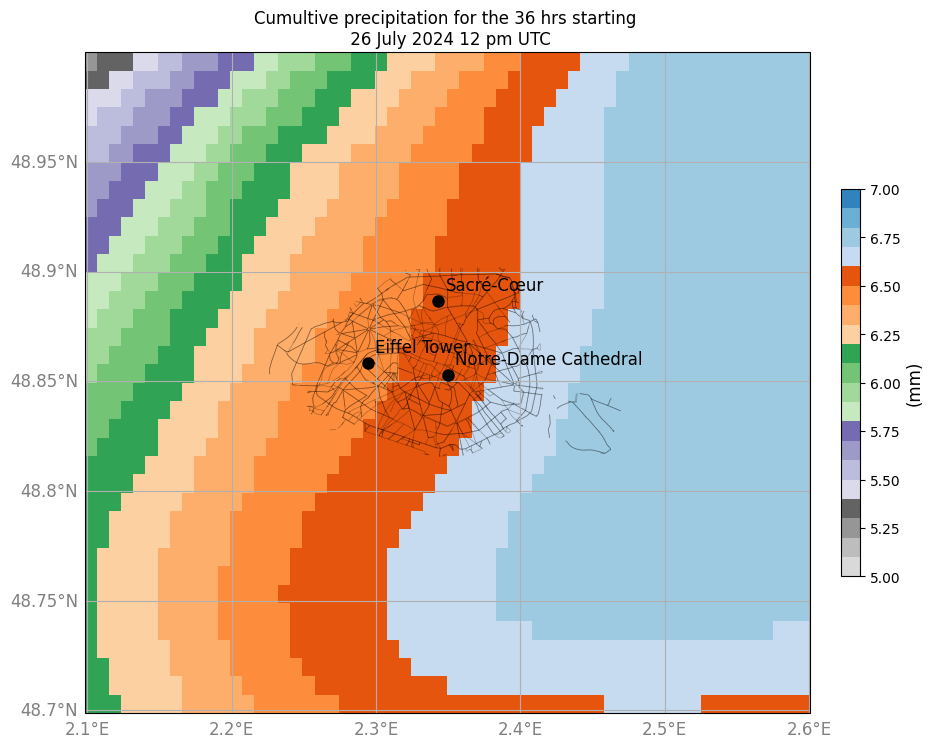

In [82]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# gdf[gdf['boundary'] == 'administrative'].boundary.plot(ax=ax, color="black")
im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.sum(dim='time').plot(
    cmap='tab20c_r',
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmax=7,vmin=5,
    add_colorbar=False  # Disable the default colorbar
)
major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())
# Add a custom colorbar with a smaller size
cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Mark important locations in Paris
important_locations = {
    "Eiffel Tower": (48.8584, 2.2945),
    # "Louvre Museum": (48.8606, 2.3376),
    "Notre-Dame Cathedral": (48.8530, 2.3499),
    # "Arc de Triomphe": (48.8738, 2.2950),
    "Sacré-Cœur": (48.8867, 2.3431)
}

for location, (lat, lon) in important_locations.items():
    ax.plot(lon, lat, marker='o', color='black', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 0.005, lat + 0.005, location, transform=ccrs.PlateCarree(), fontsize=12, color='black')

plt.title('Cumultive precipitation for the 36 hrs starting \n 26 July 2024 12 pm UTC')


Text(0.5, 1.0, 'Cumultive precipitation for the 24 hrs starting \n 26 July 2024 12 pm UTC')

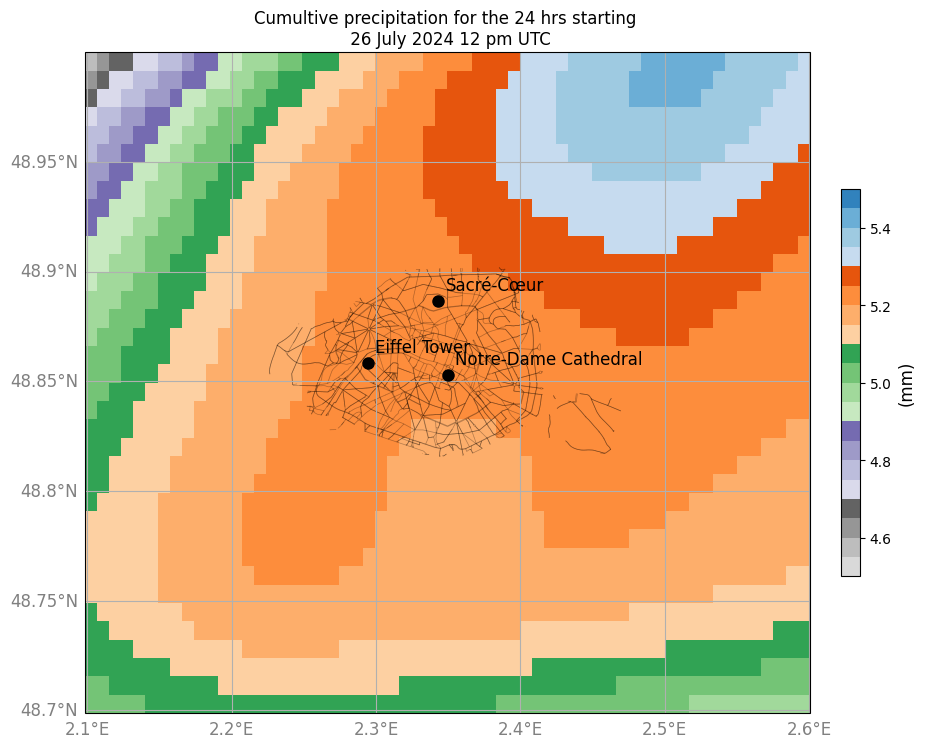

In [119]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# gdf[gdf['boundary'] == 'administrative'].boundary.plot(ax=ax, color="black")
im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.isel(time=slice(0,24)).sum(dim='time').plot(
    cmap='tab20c_r',
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmax=5.5, vmin=4.5,
    add_colorbar=False  # Disable the default colorbar
)
major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())
# Add a custom colorbar with a smaller size
cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Mark important locations in Paris
important_locations = {
    "Eiffel Tower": (48.8584, 2.2945),
    # "Louvre Museum": (48.8606, 2.3376),
    "Notre-Dame Cathedral": (48.8530, 2.3499),
    # "Arc de Triomphe": (48.8738, 2.2950),
    "Sacré-Cœur": (48.8867, 2.3431)
}

for location, (lat, lon) in important_locations.items():
    ax.plot(lon, lat, marker='o', color='black', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 0.005, lat + 0.005, location, transform=ccrs.PlateCarree(), fontsize=12, color='black')

plt.title('Cumultive precipitation for the 24 hrs starting \n 26 July 2024 12 pm UTC')


In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# # gdf[gdf['boundary'] == 'administrative'].boundary.plot(ax=ax, color="black") 48.8575° N, 2.3514° E
# im = ds_pred.sel(latitude=slice(48.8575-0.05,48.8575+0.05)).sel(longitude=slice(2.3514-0.1, 2.3514+0.1)).APCP_surface.sum(dim='time').plot(
#     cmap='Blues',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     add_colorbar=False  # Disable the default colorbar
# )
# major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())
# # Add a custom colorbar with a smaller size
# cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
# cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
# cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# plt.title('Cumultive precipitation for the 36 hrs starting 24 July 2024 2 pm CET')


In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# # gdf[gdf['boundary'] == 'administrative'].boundary.plot(ax=ax, color="black") 48.8575° N, 2.3514° E
# im = ds_pred.sel(latitude=slice(48.8575-0.05,48.8575+0.05)).sel(longitude=slice(2.3514-0.1, 2.3514+0.1)).APCP_surface.sum(dim='time').plot(
#     cmap='Blues',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     add_colorbar=False,  # Disable the default colorbar
#     vmin=0
# )
# major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())
# # Add a custom colorbar with a smaller size
# cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
# cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
# cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# plt.title('Cumultive precipitation for the 36 hrs starting 24 July 2024 2 pm CET')


In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt
# import cartopy.feature as cfeature

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# # Plot the cumulative precipitation
# im = ds_pred.sel(latitude=slice(48.8575-0.05,48.8575+0.05)).sel(longitude=slice(2.3514-0.1, 2.3514+0.1)).APCP_surface.sum(dim='time').plot(
#     cmap='Blues',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     add_colorbar=False,  # Disable the default colorbar
#     vmin=0
# )

# # Plot major roads
# major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

# # Add gridlines and labels for latitude and longitude
# gl = ax.gridlines(draw_labels=True)
# gl.top_labels = False
# gl.right_labels = False
# gl.xlabel_style = {'size': 12, 'color': 'gray'}
# gl.ylabel_style = {'size': 12, 'color': 'gray'}

# # Add a custom colorbar with a smaller size
# cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
# cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
# cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# plt.title('Cumulative precipitation for the 36 hrs starting 24 July 2024 2 pm CET')
# plt.show()


In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt
# import cartopy.feature as cfeature

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# # Plot the cumulative precipitation
# im = ds_pred.sel(latitude=slice(48.8575-0.05, 48.8575+0.05)).sel(longitude=slice(2.3514-0.1, 2.3514+0.1)).APCP_surface.sum(dim='time').plot(
#     cmap='Blues',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     add_colorbar=False,  # Disable the default colorbar
#     vmin=0
# )

# # Plot major roads
# major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

# # Add gridlines and labels for latitude and longitude
# gl = ax.gridlines(draw_labels=True)
# gl.top_labels = False
# gl.right_labels = False
# gl.xlabel_style = {'size': 12, 'color': 'gray'}
# gl.ylabel_style = {'size': 12, 'color': 'gray'}

# # Mark important locations in Paris
# important_locations = {
#     "Eiffel Tower": (48.8584, 2.2945),
#     "Louvre Museum": (48.8606, 2.3376),
#     "Notre-Dame Cathedral": (48.8530, 2.3499),
#     "Arc de Triomphe": (48.8738, 2.2950),
#     "Sacré-Cœur": (48.8867, 2.3431)
# }

# for location, (lat, lon) in important_locations.items():
#     ax.plot(lon, lat, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
#     ax.text(lon + 0.005, lat + 0.005, location, transform=ccrs.PlateCarree(), fontsize=12, color='red')

# # Add a custom colorbar with a smaller size
# cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
# cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
# cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# plt.title('Cumulative precipitation for the 36 hrs starting 24 July 2024 2 pm CET')
# plt.show()


In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt
# import cartopy.feature as cfeature

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# # Plot the cumulative precipitation
# im = ds_pred.sel(latitude=slice(48.8575-0.05, 48.8575+0.05)).sel(longitude=slice(2.3514-0.15, 2.3514+0.15)).APCP_surface.sum(dim='time').plot(
#     cmap='YlGnBu',
#     ax=ax,
#     transform=ccrs.PlateCarree(),
#     add_colorbar=False,  # Disable the default colorbar
#     vmin=0
# )

# # Plot major roads
# major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())# 

# # Add gridlines and labels for latitude and longitude
# gl = ax.gridlines(draw_labels=True)
# gl.top_labels = False
# gl.right_labels = False
# gl.xlabel_style = {'size': 12, 'color': 'gray'}
# gl.ylabel_style = {'size': 12, 'color': 'gray'}

# # Mark important locations in Paris
# important_locations = {
#     # "Stade de France": (48.9244, 2.3601),
#     "Eiffel Tower": (48.8584, 2.2945),
#     "Les Invalides": (48.8561, 2.3126),
#     # "Palace of Versailles": (48.8049, 2.1204),
#     # "Roland-Garros": (48.8470, 2.2497),
#     "Grand Palais": (48.8663, 2.3125),
#     "South Paris Arena": (48.8328, 2.2875),
#     # "Saint-Denis Aquatic Center": (48.9296, 2.3579),
#     # "Paris La Défense Arena": (48.8924, 2.2232),
#     # "Parc des Princes": (48.8414, 2.2530),
#     "Bercy Arena": (48.8381, 2.3785),
#     # "Adidas Arena": (48.9015, 2.3624)
# }

# for location, (lat, lon) in important_locations.items():
#     ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
#     ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

# # Add a custom colorbar with a smaller size
# cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
# cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
# cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# plt.title('Cumulative precipitation for the 36 hrs \n starting 24 July 2024 2 pm CET')
# plt.show()


In [79]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
import imageio

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

# Define the important locations
important_locations = {
    "Eiffel Tower": (48.8584, 2.2945),
    # "Louvre Museum": (48.8606, 2.3376),
    "Notre-Dame Cathedral": (48.8530, 2.3499),
    # "Arc de Triomphe": (48.8738, 2.2950),
    "Sacré-Cœur": (48.8867, 2.3431)
}

# Get the YlGnBu colormap
cmap = plt.get_cmap('tab20c_r')
# Create a custom colormap
# cmap = mcolors.ListedColormap(['YlGnBu'])
# bounds = [0, 1]
bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Example bounds
norm = mcolors.BoundaryNorm(bounds, cmap.N)
# List to store frames
frames = []

for i in range(len(ds_pred.time)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot the precipitation for the current time step
    im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.isel(time=i).plot(
        cmap=cmap,
        norm=norm,
        ax=ax,
        transform=ccrs.PlateCarree(),
        add_colorbar=False,  # Disable the default colorbar
        vmin=0
    )

    # Plot major roads
    major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}

    # Mark important locations in Paris
    for location, (lat, lon) in important_locations.items():
        ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
        ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

    # Add a custom colorbar with a smaller size
    cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
    cbar.set_label('(mm)', size=12)  # Add text above the colorbar

    plt.title(f'Precipitation at {str(ds_pred.time.isel(time=i).values)[:13]}')

    # Save the frame
    frame_path = f'frame_{i}.png'
    plt.savefig(frame_path)
    frames.append(imageio.imread(frame_path))
    plt.close()

# Create a GIF
imageio.mimsave('precipitation.gif', frames, fps=0.8)

# # Remove the individual frame files
# import os
# for frame in frames:
#     os.remove(frame_path)


/tmp/ipykernel_2743090/2178087051.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/tmp/ipykernel_2743090/2178087051.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/tmp/ipykernel_2743090/2178087051.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path)

In [78]:
# import xarray as xr
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt
# import cartopy.feature as cfeature
# import imageio
# import pytz

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# # Define the important locations
# important_locations = {
#     "Eiffel Tower": (48.8584, 2.2945),
#     "Louvre Museum": (48.8606, 2.3376),
#     "Notre-Dame Cathedral": (48.8530, 2.3499),
#     "Arc de Triomphe": (48.8738, 2.2950),
#     "Sacré-Cœur": (48.8867, 2.3431)
# }

# # Get the YlGnBu colormap
# cmap = plt.get_cmap('YlGnBu')
# # Create a custom colormap
# # cmap = mcolors.ListedColormap(['YlGnBu'])
# # bounds = [0, 1]
# bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Example bounds
# norm = BoundaryNorm(bounds, cmap.N)

# # List to store frames
# frames = []

# # Define the time zone
# cet = pytz.timezone('CET')

# for i in range(len(ds_pred.time)):
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

#     # Plot the precipitation for the current time step
#     im = ds_pred.sel(latitude=slice(48.8575-0.05, 48.8575+0.05)).sel(longitude=slice(2.3514-0.15, 2.3514+0.15)).APCP_surface.isel(time=i).plot(
#         cmap=cmap,
#         norm=norm,
#         ax=ax,
#         transform=ccrs.PlateCarree(),
#         add_colorbar=False,  # Disable the default colorbar
#         vmin=0
#     )
#     # Plot the cumulative precipitation
#     quiver = ds_pred.sel(latitude=slice(48.8575-0.05, 48.8575+0.05)).sel(longitude=slice(2.3514-0.15, 2.3514+0.15)).isel(time=i).plot.quiver(
#         x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground', ax=ax, transform=ccrs.PlateCarree(), scale=250
#     )
#     # Plot major roads
#     major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

#     # Add gridlines and labels for latitude and longitude
#     gl = ax.gridlines(draw_labels=True)
#     gl.top_labels = False
#     gl.right_labels = False
#     gl.xlabel_style = {'size': 12, 'color': 'gray'}
#     gl.ylabel_style = {'size': 12, 'color': 'gray'}

#     # Mark important locations in Paris
#     for location, (lat, lon) in important_locations.items():
#         ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
#         ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

#     # Add a custom colorbar with a smaller size
#     cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
#     cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
#     cbar.set_label('(mm)', size=12)  # Add text above the colorbar

#     # Convert time to CET and format it for the title
#     utc_time = ds_pred.time.isel(time=i).values
#     utc_time = pd.to_datetime(utc_time)  # Convert numpy.datetime64 to pandas.Timestamp
#     cet_time = utc_time.tz_localize('UTC').tz_convert(cet)
#     plt.title(f'Precipitation at {cet_time.strftime("%Y-%m-%d %H:%M %Z")}')

#     # Save the frame
#     frame_path = f'frame_{i}.png'
#     plt.savefig(frame_path)
#     frames.append(imageio.imread(frame_path))
#     plt.close()

# # Create a GIF with a slower speed and set it to loop
# imageio.mimsave('precipitation.gif', frames, fps=0.2, loop=0)

# # Remove the individual frame files
# import os
# for frame_path in [f'frame_{i}.png' for i in range(len(ds_pred.time)-1)]:
#     os.remove(frame_path)


In [121]:
ds_pred['ws'] = np.sqrt(ds_pred['UGRD_10maboveground']**2+ds_pred['VGRD_10maboveground']**2)

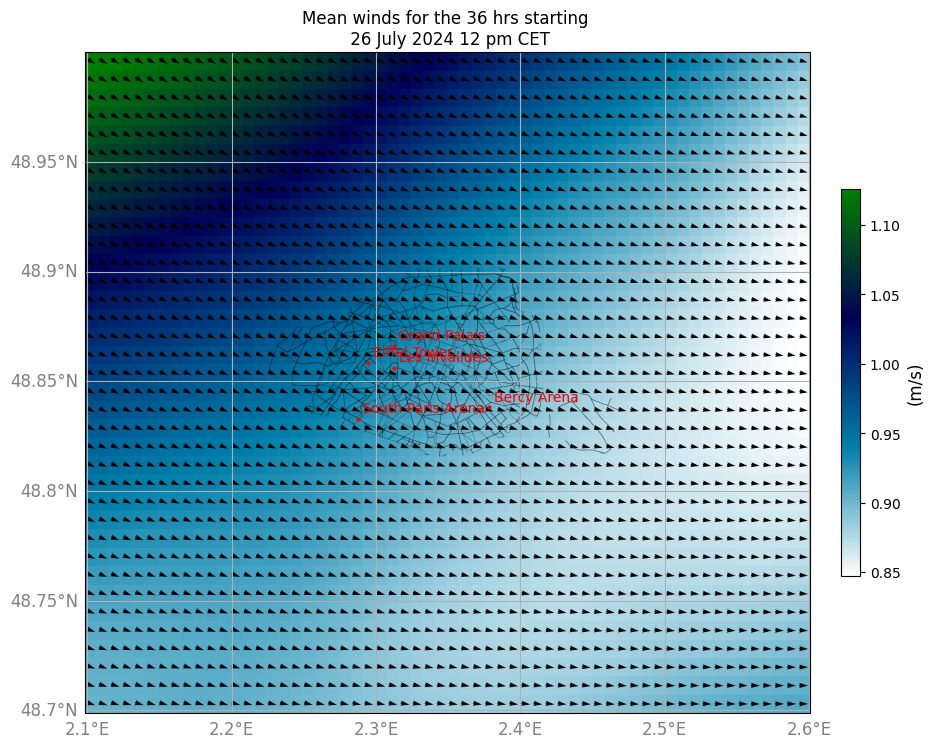

In [93]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the cumulative precipitation
im = ds_pred['ws'].sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).mean(dim='time').plot(add_colorbar=False, cmap='ocean_r')
quiver = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).sum(dim='time').plot.quiver(
    x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground', ax=ax, transform=ccrs.PlateCarree()
)
# Plot wind vectors using xarray's plot.quiver method with scaling


# Plot major roads
major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())# 

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Mark important locations in Paris
important_locations = {
    # "Stade de France": (48.9244, 2.3601),
    "Eiffel Tower": (48.8584, 2.2945),
    "Les Invalides": (48.8561, 2.3126),
    # "Palace of Versailles": (48.8049, 2.1204),
    # "Roland-Garros": (48.8470, 2.2497),
    "Grand Palais": (48.8663, 2.3125),
    "South Paris Arena": (48.8328, 2.2875),
    # "Saint-Denis Aquatic Center": (48.9296, 2.3579),
    # "Paris La Défense Arena": (48.8924, 2.2232),
    # "Parc des Princes": (48.8414, 2.2530),
    "Bercy Arena": (48.8381, 2.3785),
    # "Adidas Arena": (48.9015, 2.3624)
}

for location, (lat, lon) in important_locations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=2, transform=ccrs.PlateCarree())
    ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

# Add a custom colorbar with a smaller size
cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
cbar.set_label('(m/s)', size=12)  # Add text above the colorbar

plt.title('Mean winds for the 36 hrs starting \n 26 July 2024 12 pm CET')
plt.show()


In [122]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
import imageio

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

# Define the important locations
important_locations = {
    "Eiffel Tower": (48.8584, 2.2945),
    # "Louvre Museum": (48.8606, 2.3376),
    "Notre-Dame Cathedral": (48.8530, 2.3499),
    # "Arc de Triomphe": (48.8738, 2.2950),
    "Sacré-Cœur": (48.8867, 2.3431)
}

# Get the YlGnBu colormap
cmap = plt.get_cmap('tab20c_r')
# Create a custom colormap
# cmap = mcolors.ListedColormap(['YlGnBu'])
# bounds = [0, 1]
bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Example bounds
norm = mcolors.BoundaryNorm(bounds, cmap.N)
# List to store frames
frames = []

for i in range(len(ds_pred.time)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # # Plot the precipitation for the current time step
    # im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.isel(time=i).plot(
    #     cmap=cmap,
    #     norm=norm,
    #     ax=ax,
    #     transform=ccrs.PlateCarree(),
    #     add_colorbar=False,  # Disable the default colorbar
    #     vmin=0
    # )
    im = ds_pred['ws'].sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).isel(time=i).plot(add_colorbar=False, cmap='ocean_r', vmin=0, vmax=2)
    quiver = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).isel(time=i).plot.quiver(
        x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground', ax=ax, transform=ccrs.PlateCarree()
    )
    # Plot major roads
    major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}

    # Mark important locations in Paris
    for location, (lat, lon) in important_locations.items():
        ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
        ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

    # Add a custom colorbar with a smaller size
    cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
    cbar.set_label('(m/s)', size=12)  # Add text above the colorbar

    plt.title(f'Winds at {str(ds_pred.time.isel(time=i).values)[:13]}')

    # Save the frame
    frame_path = f'frame__winds{i}.png'
    plt.savefig(frame_path)
    frames.append(imageio.imread(frame_path))
    plt.close()

# Create a GIF
imageio.mimsave('winds.gif', frames, fps=0.8)

# # Remove the individual frame files
# import os
# for frame in frames:
#     os.remove(frame_path)


/tmp/ipykernel_2743090/1190834950.py:77: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/tmp/ipykernel_2743090/1190834950.py:77: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/tmp/ipykernel_2743090/1190834950.py:77: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path)

In [96]:
# ds_pred = xr.open_dataset('/home/ms86336/Downloads/paris/paris_outputs/graphcast_2024_07_24_paris_36hr_pred.nc')

In [97]:
# cols = ['APCP_surface', 'UGRD_10maboveground', 'VGRD_10maboveground']
# ds_pred[cols].to_netcdf('paris_meteogan.nc')

In [99]:
ds_pred = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_26_paris_36hr_temppred.nc')

In [106]:
ds_pred['t2m'] = ds_pred.TMP_2maboveground - ds_pred.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').mean(dim='time') + ds_gc.t2m.mean(dim='lat').mean(dim='lon').mean(dim='time') - 273.15

Text(0.5, 1.0, 'Mean surface temperature for Paris (48.7-49N, 2.1-2.6E) starting \n 26 July 2024 12 pm UTC')

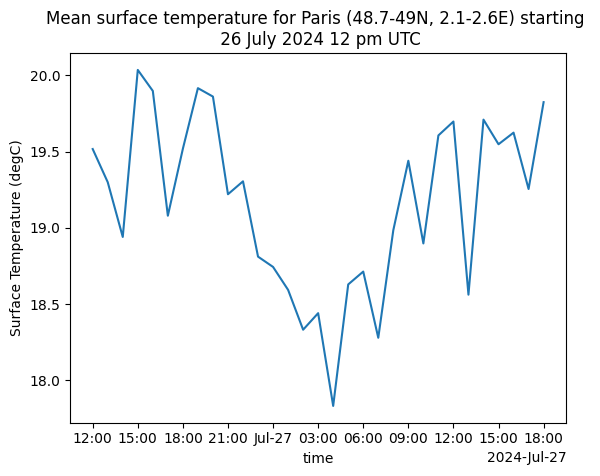

In [108]:
ds_pred.t2m.isel(latitude=slice(20,-20)).isel(longitude=slice(20,-20)).mean(dim='latitude').mean(dim='longitude').plot()
plt.ylabel('Surface Temperature (degC)')
plt.title('Mean surface temperature for Paris (48.7-49N, 2.1-2.6E) starting \n 26 July 2024 12 pm UTC')

Text(0.5, 1.0, 'Mean surface temperature for the 24 hrs starting \n 26 July 2024 12 pm UTC')

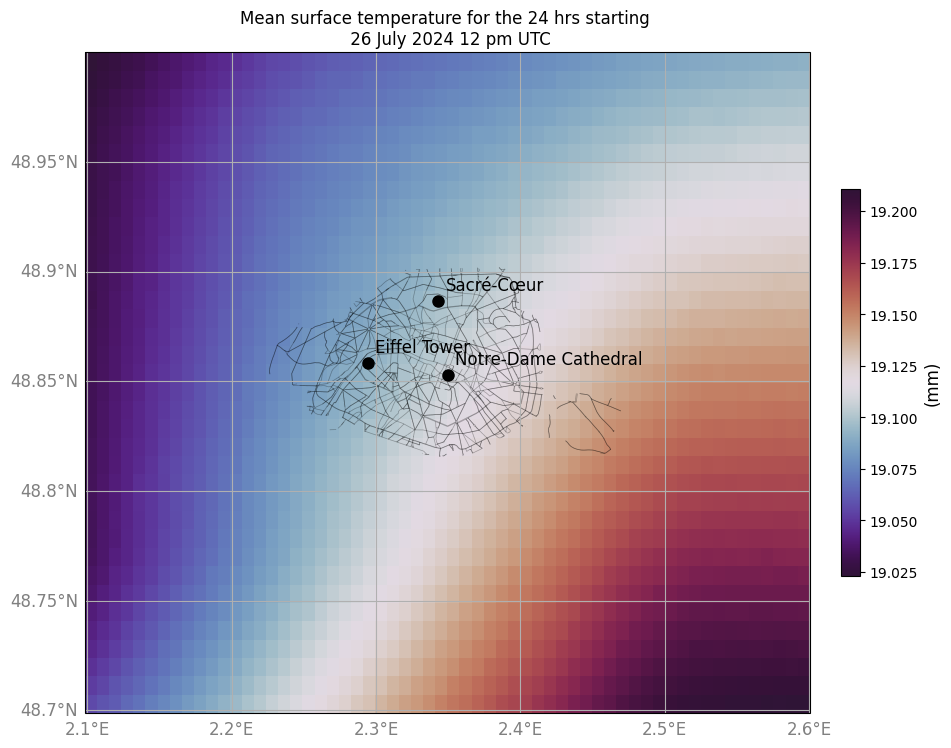

In [112]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# gdf[gdf['boundary'] == 'administrative'].boundary.plot(ax=ax, color="black")
im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).t2m.isel(time=slice(0,24)).mean(dim='time').plot(
    cmap='twilight_shifted',
    ax=ax,
    transform=ccrs.PlateCarree(),
    # vmax=19, vmin=25,
    add_colorbar=False  # Disable the default colorbar
)
major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())
# Add a custom colorbar with a smaller size
cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
cbar.set_label('(mm)', size=12)  # Add text above the colorbar

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Mark important locations in Paris
important_locations = {
    "Eiffel Tower": (48.8584, 2.2945),
    # "Louvre Museum": (48.8606, 2.3376),
    "Notre-Dame Cathedral": (48.8530, 2.3499),
    # "Arc de Triomphe": (48.8738, 2.2950),
    "Sacré-Cœur": (48.8867, 2.3431)
}

for location, (lat, lon) in important_locations.items():
    ax.plot(lon, lat, marker='o', color='black', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 0.005, lat + 0.005, location, transform=ccrs.PlateCarree(), fontsize=12, color='black')

plt.title('Mean surface temperature for the 24 hrs starting \n 26 July 2024 12 pm UTC')


In [116]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
import imageio

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

# Define the important locations
important_locations = {
    "Eiffel Tower": (48.8584, 2.2945),
    # "Louvre Museum": (48.8606, 2.3376),
    "Notre-Dame Cathedral": (48.8530, 2.3499),
    # "Arc de Triomphe": (48.8738, 2.2950),
    "Sacré-Cœur": (48.8867, 2.3431)
}

# Get the YlGnBu colormap
cmap = plt.get_cmap('tab20c_r')
# Create a custom colormap
# cmap = mcolors.ListedColormap(['YlGnBu'])
# bounds = [0, 1]
bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Example bounds
norm = mcolors.BoundaryNorm(bounds, cmap.N)
# List to store frames
frames = []

for i in range(len(ds_pred.time)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # # Plot the precipitation for the current time step
    # im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.isel(time=i).plot(
    #     cmap=cmap,
    #     norm=norm,
    #     ax=ax,
    #     transform=ccrs.PlateCarree(),
    #     add_colorbar=False,  # Disable the default colorbar
    #     vmin=0
    # )
    im = ds_pred['t2m'].sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).isel(time=i).plot(add_colorbar=False, cmap='twilight_shifted', vmin=18.5, vmax=20)
    
    # Plot major roads
    major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}

    # Mark important locations in Paris
    for location, (lat, lon) in important_locations.items():
        ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
        ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

    # Add a custom colorbar with a smaller size
    cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
    cbar.set_label('(degC)', size=12)  # Add text above the colorbar

    plt.title(f'Surface Temperature at {str(ds_pred.time.isel(time=i).values)[:13]}')

    # Save the frame
    frame_path = f'frame__temp{i}.png'
    plt.savefig(frame_path)
    frames.append(imageio.imread(frame_path))
    plt.close()

# Create a GIF
imageio.mimsave('temperature.gif', frames, fps=0.8)

# # Remove the individual frame files
# import os
# for frame in frames:
#     os.remove(frame_path)


/tmp/ipykernel_2743090/2359217575.py:75: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/tmp/ipykernel_2743090/2359217575.py:75: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/tmp/ipykernel_2743090/2359217575.py:75: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path)

# 29 July 2024

In [127]:
import xarray as xr
ds_gc = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_29_paris_36hr.nc').isel(time=slice(1,7))
ds_pred = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_29_paris_36hr_pred.nc')
ds_temp_pred = xr.open_dataset('/home/ms86336/Downloads/paris/graphcast_2024_07_29_paris_36hr_temppred.nc')
ds_pred['TMP_2maboveground'] = ds_temp_pred['TMP_2maboveground'] - np.mean(ds_temp_pred['TMP_2maboveground'].values) + np.mean(ds_gc['t2m'].values)
ds_pred = ds_pred.sel(latitude=slice(47,50.5)).sel(longitude=slice(0,5))

Text(0.5, 0, 'Time')

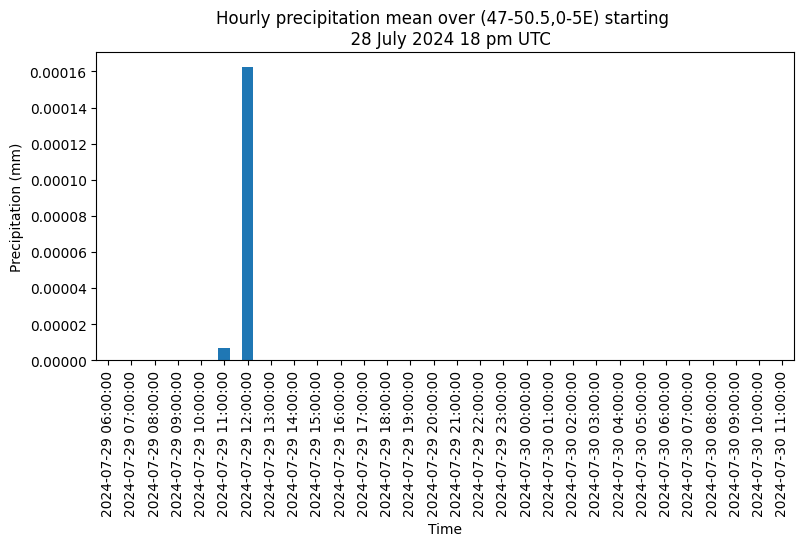

In [128]:
fig, ax = plt.subplots(figsize=(9, 4))
series = ds_pred.APCP_surface.mean(dim='latitude').isel(time=slice(0,-1)).mean(dim='longitude').to_series().plot.bar(ax=ax)
# series.plot.bar(ax=ax)
plt.title('Hourly precipitation mean over (47-50.5,0-5E) starting \n  28 July 2024 18 pm UTC')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Time')

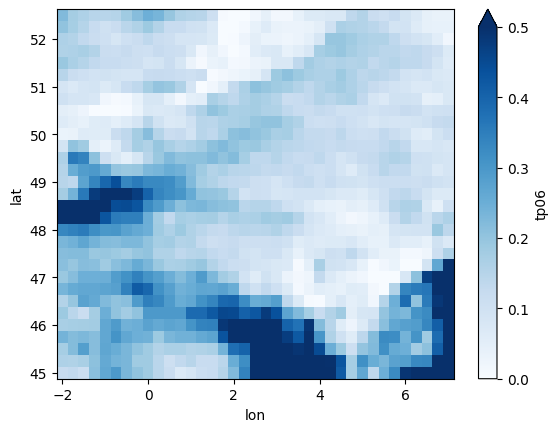

In [129]:
tp = ds_gc.tp06*1000
tp.sum(dim='time').plot(vmin=0, cmap='Blues', vmax=0.5, extend='max')

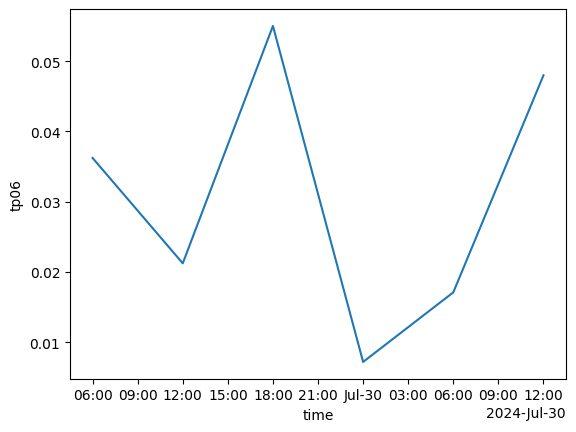

In [130]:
tp.mean(dim='lat').mean(dim='lon').plot()

In [131]:
ds_pred

<xarray.Dataset> Size: 105MB
Dimensions:              (time: 31, latitude: 387, longitude: 548)
Coordinates:
  * time                 (time) datetime64[ns] 248B 2024-07-29T06:00:00 ... 2...
  * latitude             (latitude) float64 3kB 47.0 47.01 47.02 ... 50.48 50.49
  * longitude            (longitude) float64 4kB 0.001825 0.01095 ... 4.993
Data variables:
    APCP_surface         (time, latitude, longitude) float32 26MB 0.0 ... 0.0
    TMP_2maboveground    (time, latitude, longitude) float32 26MB 295.9 ... 2...
    UGRD_10maboveground  (time, latitude, longitude) float32 26MB ...
    VGRD_10maboveground  (time, latitude, longitude) float32 26MB ...

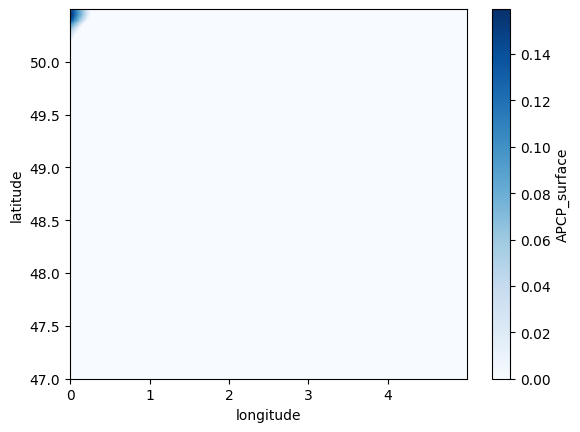

In [132]:
ds_pred.APCP_surface.sum(dim='time').plot(cmap='Blues')

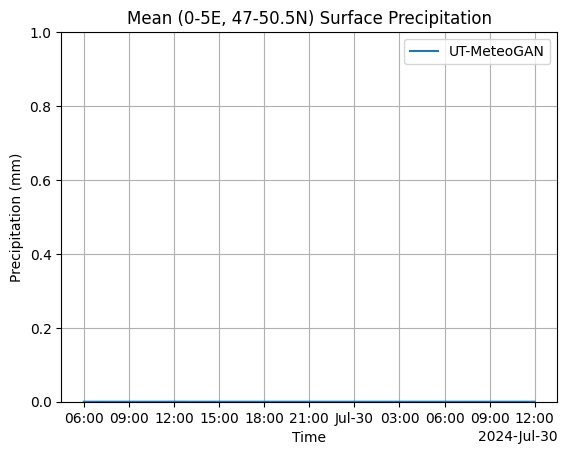

In [177]:
import matplotlib.pyplot as plt

# Plot the mean precipitation surface from ds_pred dataset
ds_pred.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot(label='UT-MeteoGAN')

# Uncomment the following lines if you want to include additional datasets in the plot
# target_data.APCP_surface.mean(dim='latitude').mean(dim='longitude').plot(label='Actual precipitation Surface')
# gc_tp = ds_gc.tp06 * 1000
# gc_tp.mean(dim='lat').mean(dim='lon').plot(label='Graphcast precipitation Surface')

plt.title('Mean (0-5E, 47-50.5N) Surface Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.ylim(0, 1)  # Set the maximum value on the y-axis to 1
plt.legend()
plt.grid()
plt.show()


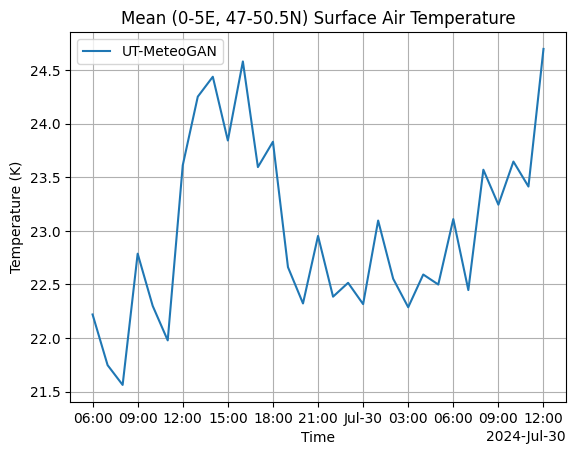

In [175]:
import matplotlib.pyplot as plt
t2m = ds_pred.TMP_2maboveground - 273.15
t2m.mean(dim='latitude').mean(dim='longitude').plot(label='UT-MeteoGAN')
# target_data.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual T2m Surface')
# ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast T2m Surface')
plt.title('Mean (0-5E, 47-50.5N) Surface Air Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()

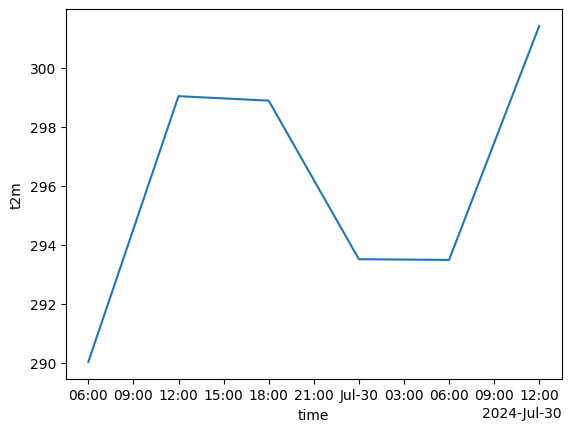

In [135]:
ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot()

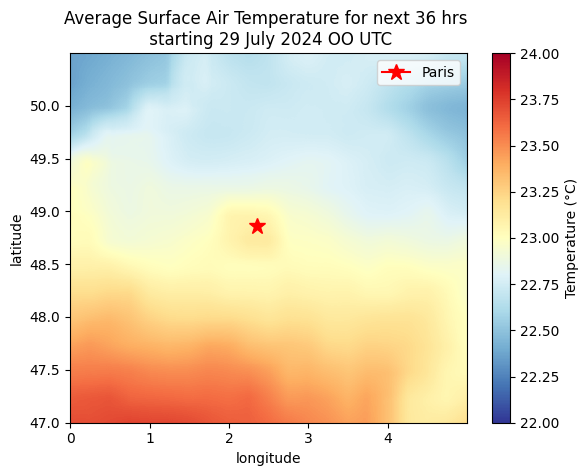

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Paris coordinates are approximately (48.8566, 2.3522)
paris_lat = 48.8566
paris_lon = 2.3522

# Plot the average surface air temperature
t2m.mean(dim='time').plot(cmap='RdYlBu_r', cbar_kwargs={'label': 'Temperature (°C)'}, vmin=22, vmax=24)

# Uncomment the following lines if you want to include additional datasets in the plot
# target_data.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual T2m Surface')
# ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast T2m Surface')

# Mark Paris with a red star
plt.plot(paris_lon, paris_lat, marker='*', color='red', markersize=12, label='Paris')

plt.title('Average Surface Air Temperature for next 36 hrs \n starting 29 July 2024 OO UTC')
# plt.xlabel('Time')
# plt.ylabel('Temperature (K)')
plt.legend()
plt.show()


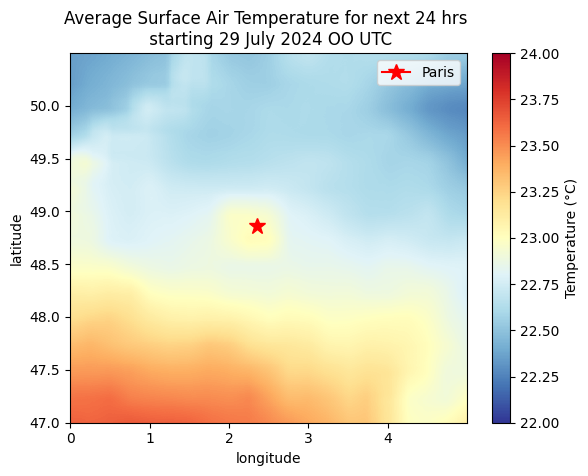

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Paris coordinates are approximately (48.8566, 2.3522)
paris_lat = 48.8566
paris_lon = 2.3522

# Plot the average surface air temperature
t2m.isel(time=slice(0,24)).mean(dim='time').plot(cmap='RdYlBu_r', cbar_kwargs={'label': 'Temperature (°C)'}, vmin=22, vmax=24)

# Uncomment the following lines if you want to include additional datasets in the plot
# target_data.TMP_2maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual T2m Surface')
# ds_gc.t2m.mean(dim='lat').mean(dim='lon').plot(label='Graphcast T2m Surface')

# Mark Paris with a red star
plt.plot(paris_lon, paris_lat, marker='*', color='red', markersize=12, label='Paris')

plt.title('Average Surface Air Temperature for next 24 hrs \n starting 29 July 2024 OO UTC')
# plt.xlabel('Time')
# plt.ylabel('Temperature (K)')
plt.legend()
plt.show()


In [183]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
import imageio

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the YlGnBu colormap
cmap = plt.get_cmap('tab20c_r')
# Create a custom colormap
# cmap = mcolors.ListedColormap(['YlGnBu'])
# bounds = [0, 1]
# bounds = [22, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.2, 23.4, 23.6, 23.8, 24]  # Example bounds
# norm = mcolors.BoundaryNorm(bounds, cmap.N)
# List to store frames
frames = []

for i in range(len(ds_pred.time)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # # Plot the precipitation for the current time step
    # im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.isel(time=i).plot(
    #     cmap=cmap,
    #     norm=norm,
    #     ax=ax,
    #     transform=ccrs.PlateCarree(),
    #     add_colorbar=False,  # Disable the default colorbar
    #     vmin=0
    # )
    im = t2m.isel(time=i).plot(cmap='RdYlBu_r', add_colorbar=False, vmin=18, vmax=28)
    # im = ds_pred['ws'].sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).isel(time=i).plot(add_colorbar=False, cmap='ocean_r', vmin=0, vmax=2)
    # quiver = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).isel(time=i).plot.quiver(
    #     x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground', ax=ax, transform=ccrs.PlateCarree()
    # )
    # # Plot major roads
    # major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}
    # Mark Paris with a red star
    ax.plot(paris_lon, paris_lat, marker='*', color='red', markersize=12, label='Paris')

    # # Mark important locations in Paris
    # for location, (lat, lon) in important_locations.items():
    #     ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    #     ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

    # Add a custom colorbar with a smaller size
    cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
    cbar.set_label('(degC)', size=12)  # Add text above the colorbar

    plt.title(f'Surface Temperature at {str(ds_pred.time.isel(time=i).values)[:13]}')
    plt.legend()

    # Save the frame
    frame_path = f'frame_temp{i}.png'
    plt.savefig(frame_path)
    frames.append(imageio.imread(frame_path))
    plt.close()

# Create a GIF
imageio.mimsave('temperature.gif', frames, fps=0.8)

# # Remove the individual frame files
# import os
# for frame in frames:
#     os.remove(frame_path)


/home/ms86336/anaconda3/envs/noaa_aorc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/home/ms86336/anaconda3/envs/noaa_aorc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/tmp/ipykernel_2590281/1160616568.py:69: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/home/ms86336/anaconda3/envs/noaa_aorc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw

In [145]:
ws = np.sqrt(ds_pred.UGRD_10maboveground.values**2+ds_pred.VGRD_10maboveground.values**2)*3.6
ds_pred['ws'] = (('time', 'latitude', 'longitude'), ws)

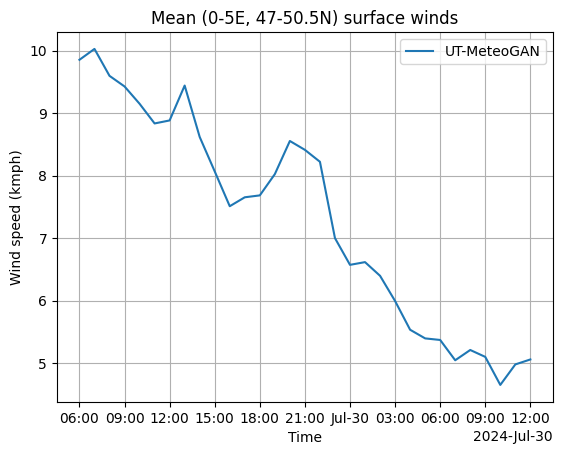

In [174]:
import matplotlib.pyplot as plt
ds_pred.ws.mean(dim='latitude').mean(dim='longitude').plot(label='UT-MeteoGAN')
# target_data.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot(label='Actual U10m Surface')

plt.title('Mean (0-5E, 47-50.5N) surface winds')
plt.xlabel('Time')
plt.ylabel('Wind speed (kmph)')
plt.grid()
plt.legend()

In [148]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cimgt
# import cartopy.feature as cfeature
# import imageio

# import xarray as xr
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Assuming ds_pred is your dataset
# # ds_pred = xr.open_dataset('your_dataset.nc')

# # Define the important locations
# important_locations = {
#     "Eiffel Tower": (48.8584, 2.2945),
#     # "Louvre Museum": (48.8606, 2.3376),
#     "Notre-Dame Cathedral": (48.8530, 2.3499),
#     # "Arc de Triomphe": (48.8738, 2.2950),
#     "Sacré-Cœur": (48.8867, 2.3431)
# }

# # Get the YlGnBu colormap
# cmap = plt.get_cmap('tab20c_r')
# # Create a custom colormap
# # cmap = mcolors.ListedColormap(['YlGnBu'])
# # bounds = [0, 1]
# bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Example bounds
# norm = mcolors.BoundaryNorm(bounds, cmap.N)
# # List to store frames
# frames = []

# for i in range(len(ds_pred.time)):
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

#     # Plot the precipitation for the current time step
#     im = ds_pred.sel(latitude=slice(48.7,49)).sel(longitude=slice(2.1,2.6)).APCP_surface.isel(time=i).plot(
#         cmap=cmap,
#         norm=norm,
#         ax=ax,
#         transform=ccrs.PlateCarree(),
#         add_colorbar=False,  # Disable the default colorbar
#         vmin=0
#     )

#     # Plot major roads
#     major_roads.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.3, transform=ccrs.PlateCarree())

#     # Add gridlines and labels for latitude and longitude
#     gl = ax.gridlines(draw_labels=True)
#     gl.top_labels = False
#     gl.right_labels = False
#     gl.xlabel_style = {'size': 12, 'color': 'gray'}
#     gl.ylabel_style = {'size': 12, 'color': 'gray'}

#     # Mark important locations in Paris
#     for location, (lat, lon) in important_locations.items():
#         ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
#         ax.text(lon + 0.003, lat + 0.003, location, transform=ccrs.PlateCarree(), fontsize=10, color='red')

#     # Add a custom colorbar with a smaller size
#     cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
#     cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
#     cbar.set_label('(mm)', size=12)  # Add text above the colorbar

#     plt.title(f'Precipitation at {str(ds_pred.time.isel(time=i).values)[:13]}')

#     # Save the frame
#     frame_path = f'frame_{i}.png'
#     plt.savefig(frame_path)
#     frames.append(imageio.imread(frame_path))
#     plt.close()

# # Create a GIF
# imageio.mimsave('precipitation.gif', frames, fps=0.8)

# # # Remove the individual frame files
# # import os
# # for frame in frames:
# #     os.remove(frame_path)


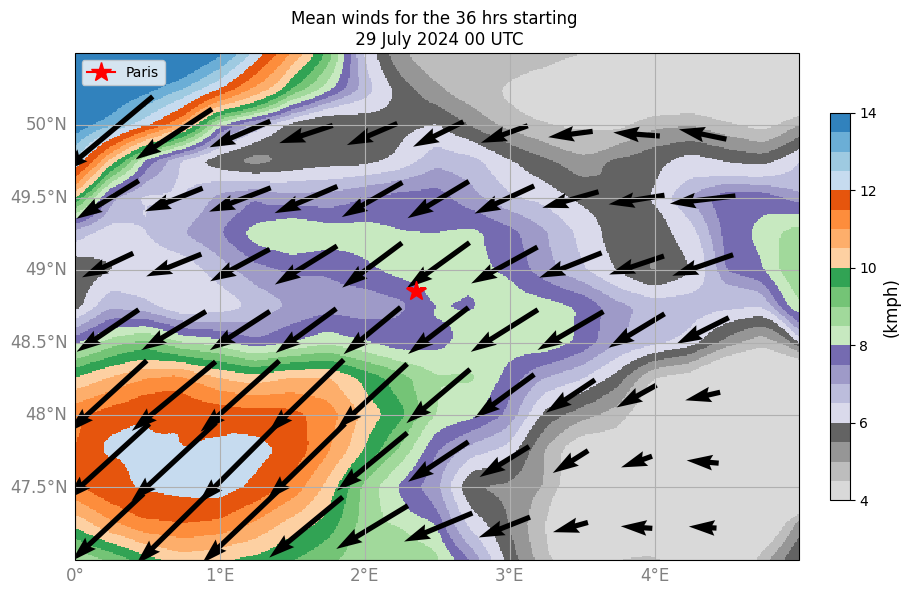

In [169]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

# Define the factor to reduce the resolution
factor = 50  # Adjust this value to control the resolution reduction

# Coarsen the data to reduce resolution
ds_pred_coarse = ds_pred.coarsen(latitude=factor, longitude=factor, boundary='trim').mean()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the cumulative precipitation
im = ds_pred['ws'].mean(dim='time').plot(ax=ax, add_colorbar=False, cmap='tab20c_r', vmax=14, vmin=4)

# Plot wind vectors using xarray's plot.quiver method with scaling
quiver = ds_pred_coarse.mean(dim='time').plot.quiver(
    x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground', ax=ax, transform=ccrs.PlateCarree(), scale=20
)

# Mark Paris with a red star
paris_lat, paris_lon = 48.8566, 2.3522
ax.plot(paris_lon, paris_lat, marker='*', color='red', markersize=15, transform=ccrs.PlateCarree(), label='Paris')

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Add a custom colorbar with a smaller size
cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
cbar.set_label('(kmph)', size=12)  # Add text above the colorbar

# Add an arrow reference for wind speed
ax.quiverkey(quiver, X=5, Y=50, U=10, label='10 kmph', labelpos='E', coordinates='axes')

plt.title('Mean winds for the 36 hrs starting \n 29 July 2024 00 UTC')
plt.legend(loc='upper left')
plt.show()


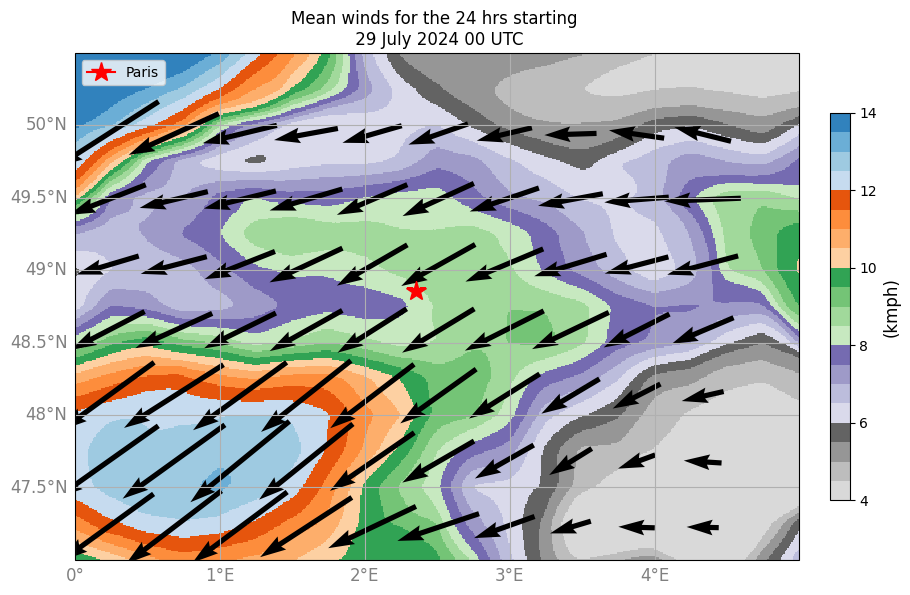

In [168]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming ds_pred is your dataset
# ds_pred = xr.open_dataset('your_dataset.nc')

# Define the factor to reduce the resolution
factor = 50  # Adjust this value to control the resolution reduction

# Coarsen the data to reduce resolution
ds_pred_coarse = ds_pred.coarsen(latitude=factor, longitude=factor, boundary='trim').mean()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the cumulative precipitation
im = ds_pred['ws'].isel(time=slice(0,24)).mean(dim='time').plot(ax=ax, add_colorbar=False, cmap='tab20c_r', vmax=14, vmin=4)

# Plot wind vectors using xarray's plot.quiver method with scaling
quiver = ds_pred_coarse.isel(time=slice(0,24)).mean(dim='time').plot.quiver(
    x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground', ax=ax, transform=ccrs.PlateCarree(), scale=20
)

# Mark Paris with a red star
paris_lat, paris_lon = 48.8566, 2.3522
ax.plot(paris_lon, paris_lat, marker='*', color='red', markersize=15, transform=ccrs.PlateCarree(), label='Paris')

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

# Add a custom colorbar with a smaller size
cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
cbar.set_label('(kmph)', size=12)  # Add text above the colorbar

# Add an arrow reference for wind speed
ax.quiverkey(quiver, X=5, Y=50, U=10, label='10 kmph', labelpos='E', coordinates='axes')

plt.title('Mean winds for the 24 hrs starting \n 29 July 2024 00 UTC')
plt.legend(loc='upper left')
plt.show()


In [191]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
import imageio
import matplotlib.colors as mcolors

# Get the YlGnBu colormap
cmap = plt.get_cmap('tab20c_r')

# List to store frames
frames = []

for i in range(len(ds_pred.time)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot the cumulative precipitation
    im = ds_pred['ws'].isel(time=i).plot(ax=ax, add_colorbar=False, cmap='tab20c_r', vmax=14, vmin=4)

    # Plot wind vectors using xarray's plot.quiver method with scaling
    quiver = ds_pred_coarse.isel(time=i).plot.quiver(
        x='longitude', y='latitude', u='UGRD_10maboveground', v='VGRD_10maboveground',
        ax=ax, transform=ccrs.PlateCarree(), scale=20, 
    )

    # Add quiver key for reference arrow
    # quiver_key = ax.quiverkey(quiver, X=0.9, Y=0.9, U=1, label='1 m/s', labelpos='E')

    # Add gridlines and labels for latitude and longitude
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}

    # Mark Paris with a red star
    ax.plot(paris_lon, paris_lat, marker='*', color='red', markersize=12, label='Paris')

    # Add a custom colorbar with a smaller size
    cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Adjust the colorbar ticks if needed
    cbar.set_label('(kmph)', size=12)  # Add text above the colorbar

    plt.title(f'Winds at {str(ds_pred.time.isel(time=i).values)[:13]}')
    plt.legend()

    # Save the frame
    frame_path = f'frame_wind{i}.png'
    plt.savefig(frame_path)
    frames.append(imageio.imread(frame_path))
    plt.close()

# Create a GIF
imageio.mimsave('wind.gif', frames, fps=0.8)


/home/ms86336/anaconda3/envs/noaa_aorc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/home/ms86336/anaconda3/envs/noaa_aorc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/tmp/ipykernel_2590281/3446200156.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))
/home/ms86336/anaconda3/envs/noaa_aorc/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw

In [192]:
ds_pred['RR'] = ds_pred['APCP_surface']
ds_pred['T_2M'] = t2m
ds_pred['U_10M'] = ds_pred['UGRD_10maboveground']
ds_pred['V_10M'] = ds_pred['VGRD_10maboveground']

In [193]:
vars_ = ['RR', 'T_2M', 'U_10M', 'V_10M']

ds_pred[vars_]

<xarray.Dataset> Size: 105MB
Dimensions:    (time: 31, latitude: 387, longitude: 548)
Coordinates:
  * time       (time) datetime64[ns] 248B 2024-07-29T06:00:00 ... 2024-07-30T...
  * latitude   (latitude) float64 3kB 47.0 47.01 47.02 ... 50.47 50.48 50.49
  * longitude  (longitude) float64 4kB 0.001825 0.01095 0.02007 ... 4.984 4.993
Data variables:
    RR         (time, latitude, longitude) float32 26MB 0.0 0.0 0.0 ... 0.0 0.0
    T_2M       (time, latitude, longitude) float32 26MB 22.73 22.73 ... 24.27
    U_10M      (time, latitude, longitude) float32 26MB -2.9 -2.9 ... 0.1852
    V_10M      (time, latitude, longitude) float32 26MB -1.556 -1.56 ... -0.4771

In [194]:
ds_pred[vars_].to_netcdf('UT_METEOGAN_TEXUS_202407290000_202407301200_1km_ens.nc')